# Grocery Purchase Analysis: Descriptive Statistics & Probability Insights

Jean Jorge Fernandes

This notebook was created during my first year studying data science. I decided to create these notebooks to reinforce the concepts I learned in class. Moreover, it will be interesting to track my growth in data science over time. Some text sections are generated with AI, and I will disclose when this is the case. If there is no disclosure, the text was written by me.

This analysis examines purchase patterns for three products — **apples**, **bread**, and **milk** — across 1,000 transactions.

The goals are to:
- Summarize customer behavior using descriptive statistics.
- Apply probability theory (including the inclusion–exclusion principle and complement rule) to estimate the likelihood of various purchasing scenarios.

These insights can help guide marketing strategies, such as product bundling or targeted promotions.
(This cell was generated with AI assistance.)

## Executive Summary

We analyzed grocery store transaction data to identify purchasing trends. Milk led in sales, followed by bread, with apples as the least purchased item. Most customers buy at least one of the three products. We recommend targeted promotions for milk and bread to encourage multi-item purchases, and further investigation into the low sales of apples to determine underlying causes. 

## Loading the data

We start by importing the data (dataset generated with AI assistance). The data is a transaction dataset containing 1,000 grocery store purchases. 
Each row represents a transaction, and each column (apples, bread, milk) is a binary indicator:
- `1` → item purchased
- `0` → item not purchased

In [1]:
# load data
df <- read.csv("transactions.csv")

# preview first 5 rows
head(df)


,apples,bread,milk
,<int>,<int>,<int>
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,1
5,1,0,1
6,0,0,1


## Descriptive Statistics 

After loading the data, we begin with the basics of descriptive statistics. This section summarizes the key characteristics of the dataset, including measures such as the mean, median, mode, and standard deviation. These metrics provide a foundation for understanding the dataset before moving into probability-based analysis.

-Mean: Average purchase rate. (also represent probability of purchase for binary data).
-Median: Middle value of the distribution.
-Mode: Most frequent value.
-Standard Deviation: Measure of variability in purchases.


In [5]:
# Mean
cat("Mean")
colMeans(df)

# Median
cat("Median")
apply(df, 2, median)

# Mode
cat("Mode")
get_mode <- function(v) {
    uniq_vals <- unique(v)
    uniq_vals[which.max(tabulate(match(v, uniq_vals)))]
}
apply(df, 2, get_mode)

#Standad Deviation
cat("Standad Deviation")
apply(df, 2, sd)

Mean

apples  bread   milk 
 0.286  0.417  0.454

Median

apples  bread   milk 
     0      0      0

Mode

apples  bread   milk 
     0      0      0

Standad Deviation

apples     bread      milk 
0.4521155 0.4933096 0.4981286

The average purchase rate is 0.268 for apples, 0.417 for bread, and 0.454 for milk.
The median for all items is 0, meaning that in at least half of all transactions the item was not purchased (in binary data, the median will only be 1 if more than 50% of transactions include the item).
The mode is also 0 for all items, indicating that “not purchased” is the most common outcome.
The standard deviation values show that purchase patterns for all three items are moderately spread out, with milk having the highest variability (0.498). This suggests that milk purchases are the most evenly split between purchase and non-purchase transactions, while apples show slightly less variability.

### 💡 Business Insight:

Milk has the highest variability (0.498), indicating that purchase behavior is evenly split. With a purchase rate of 0.454, the customer base is moderately divided, leaving a large persuadable segment. Targeted promotions could be effective in converting non-purchasers.
Apples have a low average purchase rate (0.286). It would be important to investigate the reasons for low sales, as modest variability (SD = 0.452) suggests that purchase behavior is relatively consistent and may not respond strongly to discounts alone. Bundling apples with complementary products could introduce them to new customers without requiring them to purchase the item individually.
Bread has a modest purchase rate (0.417) and moderate variability (SD = 0.493). This indicates that purchase behavior is somewhat divided, leaving a sizeable persuadable segment. Targeted promotions could be effective in converting non-purchasers into regular buyers.

## Frequency Counts

This section displays the number of transactions in which each item was purchased or not purchased. While the mean gives us the probability, frequency count provides the raw transaction totals, which can be useful for inventory plannig and sales. 

In [6]:
# Frequency count for each item

lapply(df, table)

$apples

  0   1 
714 286 

$bread

  0   1 
583 417 

$milk

  0   1 
546 454 


This further confirms the rates from the previous section. The differences in counts align with the calculated means and further highlight milk's stronger presence in customers baskets. 

## Basic Visualization: Purchase Counts

The bar chart below visualizes the number of transactions in which each item was purchased. This complement the frequency count and makes it easier to compare products side-by-side.

> **Note:**  
> This notebook uses the following R packages:  
> - ggplot2  
> 
> If not already installed, run in R:  
> `install.packages("ggplot2")` (generated with AI assistance)

In [8]:
# Loading ggplot2
library(ggplot2)


item,purchases
<chr>,<int>
Apples,286
Bread,417
Milk,454


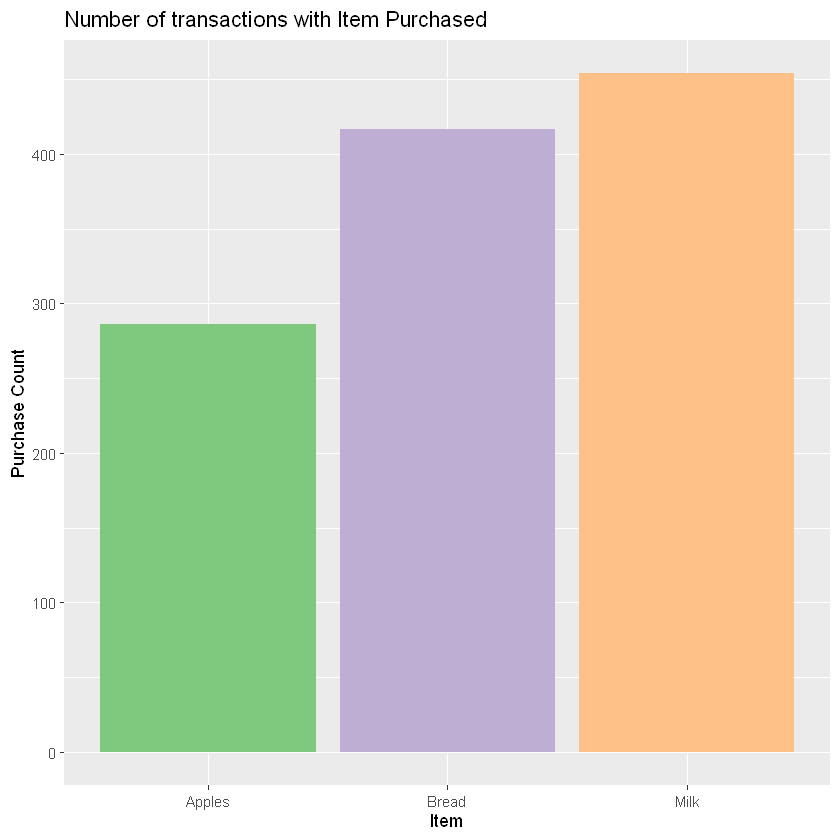

In [26]:
# Preparing data for plotting
purchase_counts <- data.frame(
    item = c("Apples", "Bread", "Milk"),
    purchases = c(sum(df$apples), sum(df$bread), sum(df$milk))
    )

purchase_counts

# Plotting the bar chart
ggplot(purchase_counts, aes(x = item, y = purchases, fill = item)) + geom_bar(stat = "identity") + 
    labs(title = "Number of transactions with Item Purchased", x = "Item", y = "Purchase Count") + 
    theme_gray() + theme(legend.position = "none") + scale_fill_brewer(palette = "Accent")

### 💡 Business Insight:

As stated before, the chart shows that milk leads in total purchases (454 transactions), followed by bread (417), and apples (286). The gap in between milk and apples futher confirms that customer strongly prefer milk, while bread holds a middle position. Given milks high variability, targered promotions could further elevate its strong performance. Apple with the lowest count should be further investigated, and mau require different strageties such as bundling or repositiing in the store to increase visibility. 

## Probability Axioms in Action

In this section, we apply the axioms of probability to calculate event prababilities from the dataset.

We will compute:<br>
1.1 Individual probabilities \(P(A)\), \(P(B)\), \(P(C)\) <br>
1.2 Pairwise intersection \(P(A \cap B)\), \(P(B \cap C)\), \(P(A \cap C)\)<br>
1.3 Triple intersection \(P(A \cap B \cap C)\)<br>

Using those, we will:<br>
2.1 Apply the inclusion-exclusion principle to find \(P(\text{at least 1 item})\)<br>
2.2 Use the complement rule ro find \(P(\text{none})\)<br>

In [34]:
# Individual Probabilities
pA <- mean(df$apples)
pB <- mean(df$bread)
pC <- mean(df$milk)

# Pairwise intersection
pAB <- mean(df$apples & df$bread)
pBC <- mean(df$bread & df$milk)
pAC <- mean(df$milk & df$apples)

# Triple intersection
pABC <- mean(df$apples & df$bread & df$milk)

# Inclusion-Exclusion: at least 1 
p_atleast1 <- pA + pB + pC - pAB - pBC - pCA + pABC

# Complement: none
p_none <- 1- p_atleast1

list(
  P_A = pA,
  P_B = pB,
  P_C = pC,
  P_AB = pAB,
  P_BC = pBC,
  P_AC = pAC,
  P_ABC = pABC,
  P_atleast1 = p_atleast1,
  P_none = p_none
)

$P_A
[1] 0.286

$P_B
[1] 0.417

$P_C
[1] 0.454

$P_AB
[1] 0.108

$P_BC
[1] 0.186

$P_AC
[1] 0.138

$P_ABC
[1] 0.046

$P_atleast1
[1] 0.771

$P_none
[1] 0.229

### 💡 Business Insight:

The probability of a customer purchasing at least one of the three items is high (0.771), while the probability of purchasing none is low (0.229). This indicates that these products function as staples in customer baskets. The strategic focus should be on maximizing quantity per basket. Since these items are already present in most transactions, targeted actions could include loyalty program rewards, multi-buy offers, and cross-promotions to encourage customers to purchase multiple items. (Marketing strategies generated with AI assistance.)

## Results & and Final Insights

This notebook analyzed data from a grocery store dataset and identified several important business insights. Milk was the most purchased item, followed by bread, with apples as the least purchased. The bar chart confirmed this ranking. In terms of variability, milk showed the highest variability, followed by bread, then apples. The high variability for milk indicates that customers are split, creating an opportunity for targeted promotions.

Apples’ low purchase rate suggests the need for further investigation into why sales are weak. Since the probability of a customer purchasing at least one of the three items is high and the probability of purchasing none is low, these products can be considered staples. Marketing strategies should focus on encouraging customers to purchase multiple items per transaction, particularly bread and milk.

These recommendations are limited to the three products analyzed. For future analysis, expanding the product list, examining seasonal trends, and performing customer segmentation are recommended to generate more comprehensive insights.